In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from numpy.random import default_rng
rng = default_rng()

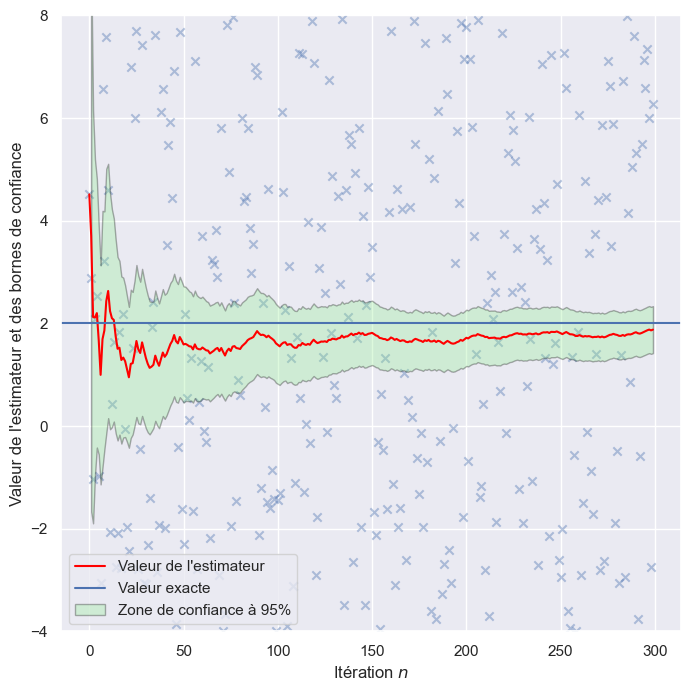

In [2]:
n = 300
U = stats.uniform.rvs(loc=-4, scale=12, size=n, random_state=rng)
est = 1/np.arange(1,n+1) * U.cumsum()
sigma2 = 1/(np.arange(2,n+1)- 1) * ((U**2).cumsum()[1:] - (est**2)[1:])
ic = np.sqrt(sigma2/np.arange(2,n+1))*stats.norm.ppf(0.975)

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(np.arange(n), U, alpha=0.4, marker='x')
ax.set_ylabel("Valeur de l'estimateur et des bornes de confiance")
ax.set_xlabel("Itération $\\it{n}$")
ax.plot(np.arange(n), est, color='red', label="Valeur de l'estimateur")
ax.axhline(2, color='C0', label='Valeur exacte')
ax.fill_between(np.arange(1,n),(est[1:]-ic), (est[1:]+ic),color='lightgreen', edgecolor='black', alpha=0.3, label='Zone de confiance à 95%')
ax.legend()
ax.set_ylim(-4,8)
plt.show()



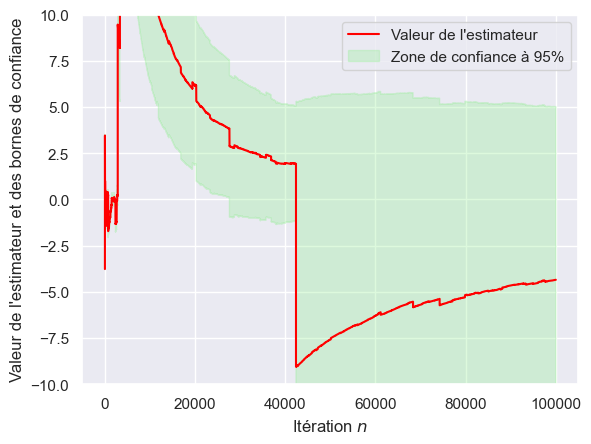

In [3]:
n = 100000
C = stats.cauchy.rvs(size=n)
est = 1/np.arange(1,n+1) * C.cumsum()
sigma2 = 1/(np.arange(2,n+1)-1) * ((C**2).cumsum()[1:] - est[1:]**2)

ic = np.sqrt(sigma2/n)*stats.norm.ppf(0.975)

fig,ax = plt.subplots()
ax.set_ylim(-10,10)
#ax.scatter(np.arange(1,n+1), C, s=1, marker='x', color='C0')
ax.plot(np.arange(1,n+1), est, color='red', label="Valeur de l'estimateur")
ax.fill_between(np.arange(1,n),(est[1:]-ic), (est[1:]+ic), edgecolor='black', color='lightgreen', alpha=0.3, label='Zone de confiance à 95%')
ax.set_ylabel("Valeur de l'estimateur et des bornes de confiance")
ax.set_xlabel("Itération $\\it{n}$")
ax.legend()
plt.show()



-0.12099787220321628


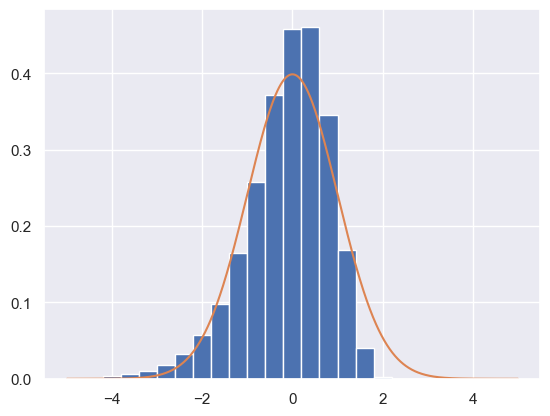

In [33]:
n = 10
M = 100000
U = stats.uniform.rvs(loc=-4, scale=12, random_state=rng, size=(M,n))
est = 1/np.arange(1,n+1) * U.cumsum(axis=1)
sigma2 = 1/(np.arange(2,n+1)-1) * ((U**2).cumsum(axis=1)[:, 1:] - (est**2)[:, 1:])
eps = np.sqrt(np.arange(2,n+1)/sigma2) * (est[:,1:]-2)
print(np.mean(eps[:,-1]))


fig, ax = plt.subplots()
ax.hist(eps[:,-1], bins=25, range=(-5,5), density=True)
ax.plot(np.linspace(-5,5,1000), stats.norm.pdf(np.linspace(-5,5,1000)))
plt.show()


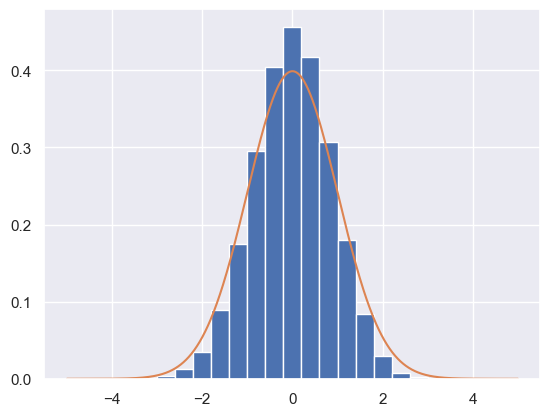

In [34]:
n = 1000
M = 100000
U = stats.uniform.rvs(loc=-4, scale=12, random_state=rng, size=(M,n))
est = 1/np.arange(1,n+1) * U.cumsum(axis=1)
sigma2 = 1/(np.arange(2,n+1)-1) * ((U**2).cumsum(axis=1)[:, 1:] - (est**2)[:, 1:])
eps = np.sqrt(np.arange(2,n+1)/sigma2) * (est[:,1:]-2)


fig, ax = plt.subplots()
ax.hist(eps[:,-1], bins=25, range=(-5,5), density=True)
ax.plot(np.linspace(-5,5,1000), stats.norm.pdf(np.linspace(-5,5,1000)))
plt.show()


In [103]:
##exo1.3

In [22]:
def monte_carlo(sample, proba=0.95):
    est = 1/len(sample[0]) * sample.sum(axis=1)
    sigma2 = 1/(len(sample[0])-1) * ((sample**2).sum(axis=1) - est**2)
    ic_up = est+np.sqrt(sigma2/len(sample[0]))*stats.norm.ppf(1-proba/2)
    ic_down = est-np.sqrt(sigma2/len(sample[0]))*stats.norm.ppf(1-proba/2)
    return np.column_stack([est, sigma2, ic_up, ic_down])

In [31]:
import pandas as pd

beta = np.array([0.2, 0.5, 1, 2, 3, 5])
n = 1000000

G = stats.norm.rvs(size=n)
sample = np.array([np.exp(b*G) for b in beta])
print(sample.shape)
result = monte_carlo(sample)
result = np.column_stack([result, np.exp(beta**2/2)])

res = pd.DataFrame(result, columns=["mean", "var", "low", "high", "real value"], index=beta)
print(res)
                   


(6, 1000000)
              mean           var            low           high     real value
0.2       1.020155  1.083285e+00       1.020220       1.020090       1.020201
0.5       1.133226  1.650685e+00       1.133306       1.133145       1.133148
1.0       1.650685  7.457279e+00       1.650856       1.650513       1.648721
2.0       7.457274  2.592243e+03       7.460467       7.454082       7.389056
3.0      90.417893  1.048388e+07      90.620931      90.214856      90.017131
5.0  137112.730073  1.331248e+15  139400.666935  134824.793210  268337.286521
